In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
os.chdir('../logs/')

In [2]:
def plot(name0, name1, title):
    logs0 = np.load(name0, allow_pickle=True)
    logs1 = np.load(name1, allow_pickle=True)
    print(logs1['params'])
    t_loss0 = logs0['t_loss']
    t_loss1 = logs1['t_loss']
    epochs0 = np.arange(len(t_loss0))
    epochs1 = np.arange(len(t_loss1))

    plt.semilogy(epochs0, t_loss0)
    plt.semilogy(epochs1, t_loss1)
    plt.xlabel('Steps')
    plt.ylabel('Loss')
    plt.title(title)

In [3]:
def plot2(name0, title=None):
    logs0 = np.load(name0, allow_pickle=True)
    print(logs0['params'])
    t_loss0 = logs0['t_loss']
    v_loss0 = logs0['v_loss']
    epochs0 = np.arange(len(t_loss0))

    plt.semilogy(epochs0, t_loss0)
    plt.semilogy(epochs0, v_loss0)
    plt.xlabel('Steps')
    plt.ylabel('Loss')
    if title: plt.title(title)

In [4]:
def plot3(name0, title=None, rate=10, cutoff=1.0):
    logs0 = np.load(name0, allow_pickle=True)
    print(logs0['params'])
    t_loss0 = logs0['t_loss']
    v_loss0 = logs0['v_loss']
    epochs0 = np.arange(len(t_loss0))

    cutoff = int(cutoff * len(epochs0))
    plt.semilogy(epochs0[:cutoff], t_loss0[:cutoff])
    plt.semilogy(epochs0[rate-1:cutoff:rate], v_loss0[:cutoff//rate])
    plt.xlabel('Steps')
    plt.ylabel('Loss')
    if title: plt.title(title)

## Initial training
* 100 self plays games using randomly-initialized networks
Results:
* Network at 10 epochs is weaker than random. Network at 100 epochs is even weaker.
* Overfitting on data at less than 10 epochs. I need much more training data.

Namespace(batch_size=1024, decay=1e-05, epochs=100, lr=0.1, momentum=0.9, t_tuple=(0, 100), weights='00000')


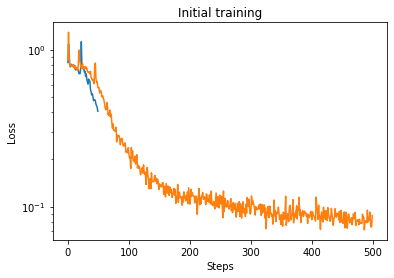

In [3]:
names = [f'from00000_0_100bs1024lr0.1d1e-05e{e}.npz' for e in (10, 100)]
plot(*names, 'Initial training')
plt.show()

## Validation and more data
* Overfitting after ~4 epochs.
* Ideally, I'd like to train for 8 epochs to get at least $(1-\tfrac{1}{e})$ fraction of all permutations of $D_4$ augmentation.

Namespace(batch_size=1024, decay=1e-05, epochs=10, lr=0.1, momentum=0.9, t_tuple=[10, 100], v_tuple=[0, 10], weights='00000')


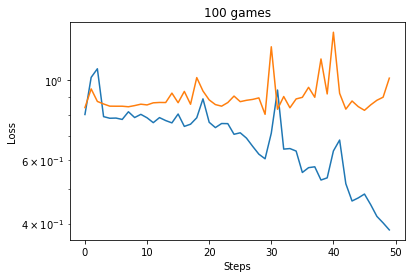

In [4]:
name = 'from00000_10_100bs1024lr0.1d1e-05e10.npz'
plot2(name, '100 games')
plt.show()

Namespace(batch_size=1024, decay=1e-05, epochs=10, lr=0.1, momentum=0.9, t_tuple=(20, 200), v_tuple=(0, 20), weights='00000')


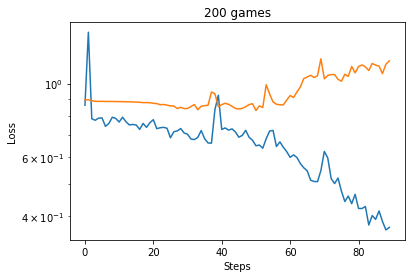

In [9]:
name = 'from00000_20_200bs1024lr0.1d1e-05e10.npz'
plot2(name, '200 games')
plt.show()

Namespace(batch_size=1024, decay=1e-05, epochs=10, lr=0.1, momentum=0.9, t_tuple=[30, 300], v_tuple=[0, 30], weights='00000')


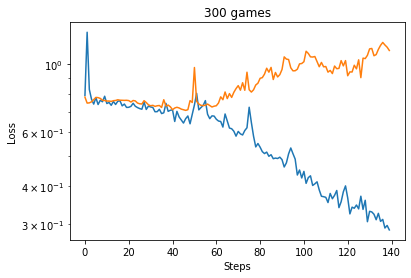

In [10]:
name = 'from00000_30_300bs1024lr0.1d1e-05e10.npz'
plot2(name, '300 games')
plt.show()

Namespace(batch_size=1024, decay=1e-05, epochs=10, lr=0.1, momentum=0.9, t_tuple=[40, 400], v_tuple=[0, 40], weights='00000')


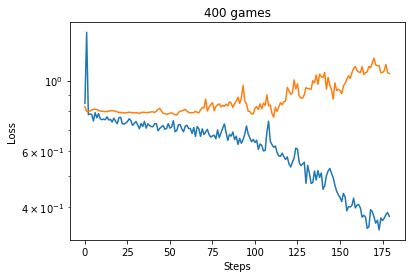

In [11]:
name = 'from00000_40_400bs1024lr0.1d1e-05e10.npz'
plot2(name, '400 games')
plt.show()

Namespace(batch_size=1024, decay=1e-05, epochs=10, lr=0.1, momentum=0.9, t_tuple=[50, 500], v_tuple=[0, 50], weights='00000')


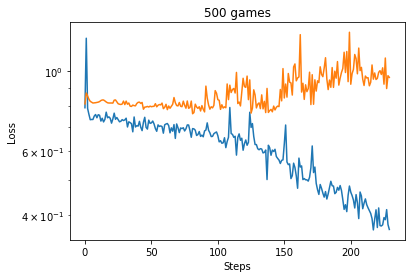

In [12]:
name = 'from00000_50_500bs1024lr0.1d1e-05e10.npz'
plot2(name, '500 games')
plt.show()

Namespace(batch_size=1024, decay=0.001, epochs=10, lr=0.1, momentum=0.9, t_tuple=[50, 500], v_tuple=[0, 50], weights='00000')


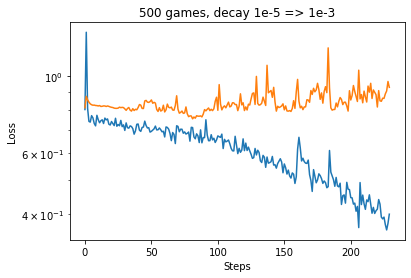

In [13]:
name = 'from00000_50_500bs1024lr0.1d0.001e10.npz'
plot2(name, '500 games, decay 1e-5 => 1e-3')
plt.show()

Namespace(batch_size=2048, decay=0.001, epochs=10, lr=0.1, momentum=0.9, t_tuple=[50, 500], v_tuple=[0, 50], weights='00000')
Overfitting occurs slower


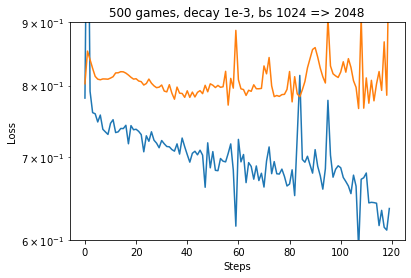

In [20]:
name = 'from00000_50_500bs2048lr0.1d0.001e10.npz'
plot2(name, '500 games, decay 1e-3, bs 1024 => 2048')

plt.ylim([.6, .9])
plt.show()

## Only train 4 epochs

Namespace(batch_size=2048, decay=0.001, epochs=4, lr=0.1, momentum=0.9, t_tuple=[50, 500], v_tuple=[0, 50], weights='00000')


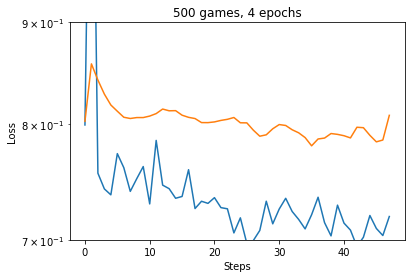

In [22]:
name = 'from00000_50_500bs2048lr0.1d0.001e4.npz'
plot2(name, '500 games, 4 epochs')
plt.ylim([.7, .9])
plt.show()

Namespace(batch_size=2048, decay=0.001, epochs=4, lr=0.1, momentum=0.9, t_tuple=[50, 500], v_tuple=[0, 50], weights='00000')


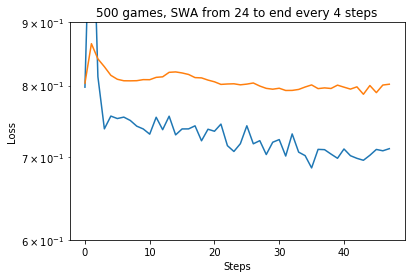

In [24]:
name = 'SWA_from00000_50_500bs2048lr0.1d0.001e4.npz'
plot2(name, '500 games, SWA from 24 to end every 4 steps')
plt.ylim([.6, .9])
plt.show()

## More data
* Network trained on 500 games could not beat initial random network.

Namespace(batch_size=2048, decay=0.001, epochs=10, lr=0.1, momentum=0.9, t_tuple=[75, 750], v_tuple=[0, 75], weights='00000')


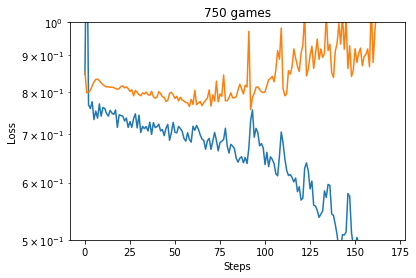

In [9]:
name = 'from00000_75_750bs2048lr0.1d0.001e10.npz'
plot2(name, '750 games')
plt.ylim([0.5, 1.0])
plt.show()

Namespace(batch_size=2048, decay=0.001, epochs=10, lr=0.1, momentum=0.9, t_tuple=[100, 1000], v_tuple=[0, 100], weights='00000')


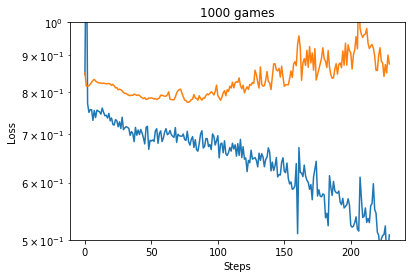

In [10]:
name = 'from00000_100_1000bs2048lr0.1d0.001e10.npz'
plot2(name, '1000 games')
plt.ylim([0.5, 1.0])
plt.show()

Namespace(batch_size=2048, decay=0.001, epochs=10, lr=0.1, momentum=0.9, t_tuple=[100, 1000], v_tuple=[0, 100], weights='00000')


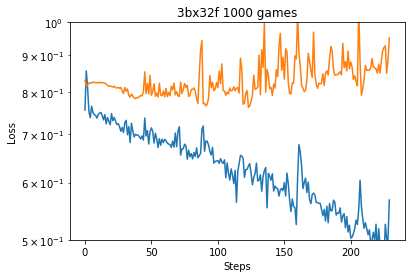

Even super small networks still exhibit overfitting behavior


In [25]:
name = '3bx32f_from00000_100_1000bs2048lr0.1d0.001e10.npz'
plot2(name, '3bx32f 1000 games')
plt.ylim([0.5, 1.0])
plt.show()
print('Even super small networks still exhibit overfitting behavior')

Namespace(batch_size=2048, decay=0.001, epochs=10, lr=0.1, momentum=0.9, t_tuple=[100, 1000], v_tuple=[0, 100], weights='00000')


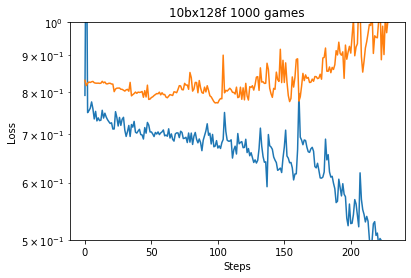

Larger networks have similar overfitting profile.


In [26]:
name = '10bx128f_from00000_100_1000bs2048lr0.1d0.001e10.npz'
plot2(name, '10bx128f 1000 games')
plt.ylim([0.5, 1.0])
plt.show()
print('Larger networks have similar overfitting profile.')

Namespace(batch_size=2048, decay=0.001, epochs=3, lr=0.1, momentum=0.9, t_tuple=[100, 1000], v_tuple=[0, 100], weights='00000')


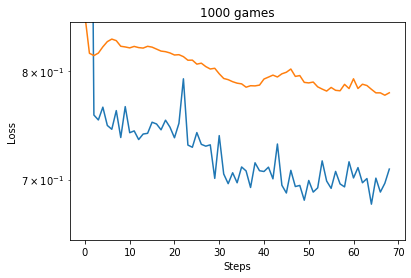

In [22]:
name = 'from00000_100_1000bs2048lr0.1d0.001e3.npz'
plot2(name, '1000 games')
plt.ylim([0.65, 0.85])
plt.show()

Overfitting in the same amount of epochs (more steps though), which suggests still lack of data (probably will need 1 million).

Val loss does appear to decrease slightly in the first ~60 epochs. Validation loss of random network is 0.82, so the network is slightly better than random. However, it might not translate into playing strength.

## Change mover plane
* from (0, 1) to (1, -1) so that network always has a non-zero plane describing location of board
* No real change in training curve, final loss, or overfitting behavior.

Namespace(batch_size=2048, decay=0.001, epochs=10, lr=0.1, momentum=0.9, t_tuple=[100, 1000], v_tuple=[0, 100], weights='00000')


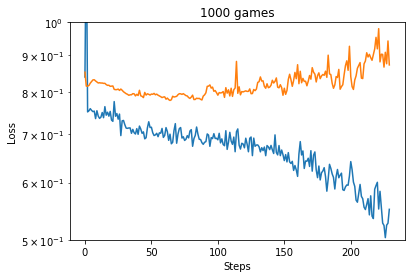

In [4]:
name = 'newplane_from00000_100_1000bs2048lr0.1d0.001e10.npz'
plot2(name, '1000 games')
plt.ylim([0.5, 1.0])
plt.show()

Namespace(batch_size=2048, decay=0.001, epochs=3, lr=0.1, momentum=0.9, t_tuple=[100, 1000], v_tuple=[0, 100], weights='00000')


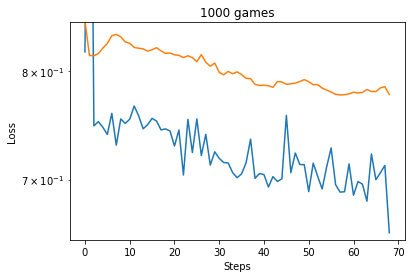

In [14]:
name = 'newplane_from00000_100_1000bs2048lr0.1d0.001e3.npz'
plot2(name, '1000 games')
plt.ylim([0.65, 0.85])
plt.show()

## 1000-1500
* Selfplay using `newplane_from00000_100_1000bs2048lr0.1d0.001e3` Vmode

Namespace(batch_size=2048, decay=0.001, epochs=5, lr=0.1, momentum=0.9, t_tuple=[150, 1500], v_tuple=[0, 150], weights='newplane_from00000_100_1000bs2048lr0.1d0.001e3')


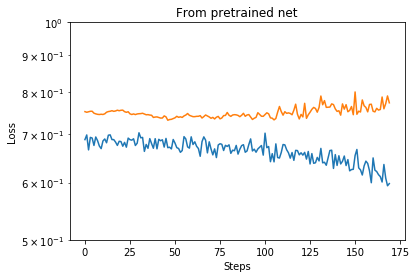

In [5]:
name = 'from_net1000e3_150_1500bs2048lr0.1d0.001e5.npz'
plot2(name, 'From pretrained net')
plt.ylim([0.5, 1.0])
plt.show()

Namespace(batch_size=2048, decay=0.001, epochs=10, lr=0.1, momentum=0.9, t_tuple=[150, 1500], v_tuple=[0, 150], weights='00000')


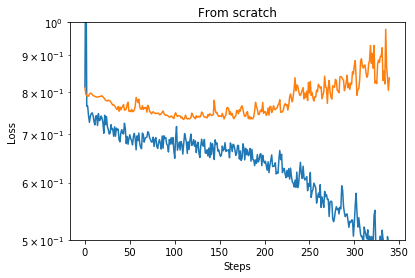

In [8]:
name = 'from00000_150_1500bs2048lr0.1d0.001e10.npz'
plot2(name, 'From scratch')
plt.ylim([0.5, 1.0])
plt.show()

Overfitting still starts around the same # of epochs, but more steps means that the network achieves a lower validation loss.

Namespace(batch_size=2048, decay=0.001, epochs=3, lr=0.1, momentum=0.9, t_tuple=[100, 1000], v_tuple=[0, 100], weights='00000')
Namespace(batch_size=2048, decay=0.001, epochs=3, lr=0.1, momentum=0.9, t_tuple=[150, 1500], v_tuple=[0, 150], weights='00000')


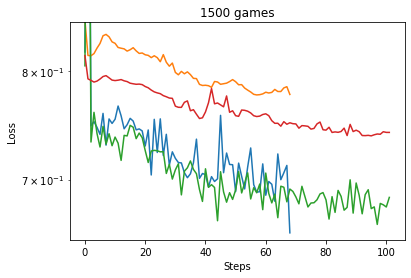

In [14]:
name = 'newplane_from00000_100_1000bs2048lr0.1d0.001e3.npz'
plot2(name, '1000 games')
name = 'from00000_150_1500bs2048lr0.1d0.001e3.npz'
plot2(name, '1500 games')
plt.ylim([0.65, 0.85])
plt.show()

## 2000

Namespace(batch_size=2048, decay=0.001, epochs=10, lr=0.1, momentum=0.9, t_tuple=[200, 2000], v_tuple=[0, 200], weights='00000')
Namespace(batch_size=4096, decay=0.001, epochs=10, lr=0.1, momentum=0.9, t_tuple=[200, 2000], v_tuple=[0, 200], weights='00000')


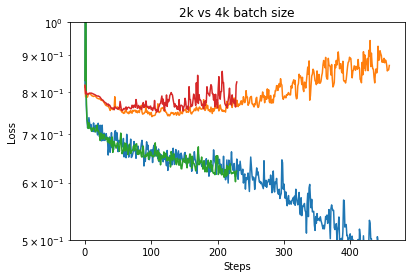

In [5]:
name = 'from00000_200_2000bs2048lr0.1d0.001e10.npz'
plot2(name)
name = 'from00000_200_2000bs4096lr0.1d0.001e10.npz'
plot2(name, '2k vs 4k batch size')
plt.ylim([0.5, 1.0])
plt.show()

Very interesting that the larger batch size (which cuts the # of steps) appears to look just like the original batch size with less steps. Seeing the extra data does not make the network train any faster. The limiting factor is the backpropagation update. On one hand this suggests that we can get away with showing more data to a network before the overfitting point by using larger batch sizes. On the other hand, we could in theory decrease the batch size until we reach that point in one epoch, thereby never showing data more than once (I would not do this for this project, but something interesting to consider in relation to super-convergence).

Namespace(batch_size=2048, decay=0.001, epochs=10, lr=0.1, momentum=0.9, t_tuple=[200, 2000], v_tuple=[0, 200], weights='00000')


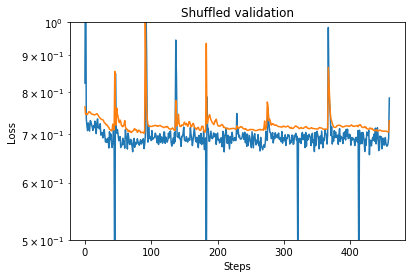

In [5]:
name = 'scr_from00000_200_2000bs2048lr0.1d0.001e10.npz'
plot2(name, 'Shuffled validation')
plt.ylim([0.5, 1.0])
plt.show()

Train on scrambled (shuffled) validation data to see how many epochs before true overfitting. However, data diversity appears to sufficiently regularize training and no overfitting occurs. Minimum val loss is lower using the shuffled validation set because it is more similar to the training set.

Namespace(batch_size=2048, decay=0.001, epochs=10, lr=0.02, momentum=0.9, t_tuple=[200, 2000], v_tuple=[0, 200], weights='00000')


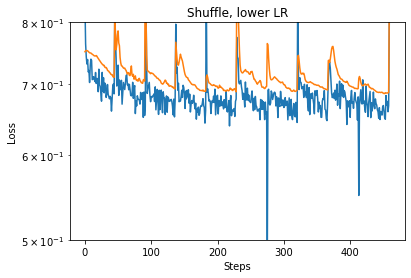

In [17]:
name = 'scr_from00000_200_2000bs2048lr0.02d0.001e10.npz'
plot2(name, 'Shuffle, lower LR')
plt.ylim([0.5, 0.8])
plt.show()

Interestingly, spikes appear to happen at the end of every epoch?? Perhaps the final batch size is insufficient?
* Yes! Training set has 92167 samples, 45 batches is 92160, so final batch is too small. Need `drop_last` flag.

Namespace(batch_size=2048, decay=0.001, epochs=10, lr=0.1, momentum=0.9, t_tuple=[200, 2000], v_tuple=[0, 200], weights='00000')


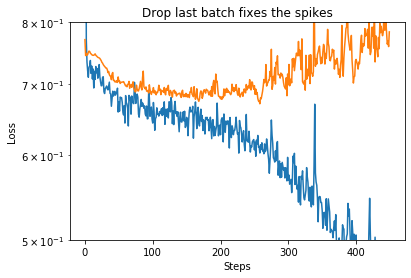

In [16]:
name = 'scr_dl_200_2000bs2048lr0.1d0.001e10.npz'
plot2(name, 'Drop last batch fixes the spikes')
plt.ylim([0.5, 0.8])
plt.show()

Namespace(batch_size=2048, decay=0.001, epochs=3, lr=0.1, momentum=0.9, t_tuple=[150, 1500], v_tuple=[0, 150], weights='00000')
Namespace(batch_size=2048, decay=0.001, epochs=3, lr=0.1, momentum=0.9, t_tuple=[200, 2000], v_tuple=[0, 200], weights='00000')


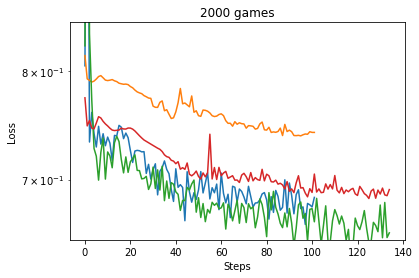

In [23]:
name = 'from00000_150_1500bs2048lr0.1d0.001e3.npz'
plot2(name, '1500 games')
name = 'scr_dl_200_2000bs2048lr0.1d0.001e3.npz'
plot2(name, '2000 games')
plt.ylim([0.65, 0.85])
plt.show()

## 2500

Namespace(batch_size=2048, decay=0.001, epochs=10, lr=0.1, momentum=0.9, t_tuple=[200, 2000], v_tuple=[0, 200], weights='00000')
Namespace(batch_size=2048, decay=0.001, epochs=10, lr=0.1, momentum=0.9, t_tuple=[250, 2500], v_tuple=[0, 250], weights='00000')
Namespace(batch_size=2048, decay=0.001, epochs=4, lr=0.1, momentum=0.9, t_tuple=[250, 2500], v_tuple=[0, 250], weights='00000')


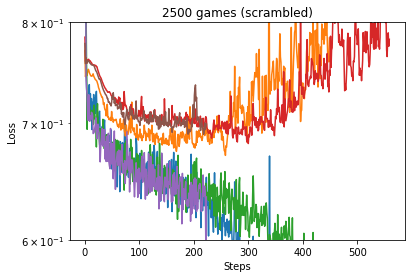

In [9]:
name = 'scr_dl_200_2000bs2048lr0.1d0.001e10.npz'
plot2(name)
name = '250_2500bs2048lr0.1d0.001e10.npz'
plot2(name, '2500 games (scrambled)')
name = '250_2500bs2048lr0.1d0.001e4.npz'
plot2(name, '2500 games (scrambled)')
plt.ylim([0.6, 0.8])
plt.show()

Namespace(batch_size=2048, decay=0.001, epochs=3, lr=0.1, momentum=0.9, t_tuple=[200, 2000], v_tuple=[0, 200], weights='00000')
Namespace(batch_size=2048, decay=0.001, epochs=4, lr=0.1, momentum=0.9, t_tuple=[250, 2500], v_tuple=[0, 250], weights='00000')


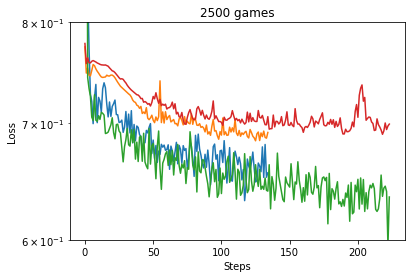

In [13]:
name = 'scr_dl_200_2000bs2048lr0.1d0.001e3.npz'
plot2(name, '2000 games')
name = '250_2500bs2048lr0.1d0.001e4.npz'
plot2(name, '2500 games')
plt.ylim([0.6, 0.8])
plt.show()

Overfitting takes longer to happen. Val loss slightly up because data is more diverse, but I expect network to be stronger.

## 3000

Namespace(batch_size=2048, decay=0.001, epochs=10, lr=0.1, momentum=0.9, t_tuple=[250, 2500], v_tuple=[0, 250], weights='00000')
Namespace(batch_size=2048, decay=0.001, epochs=10, lr=0.1, momentum=0.9, t_tuple=[300, 3000], v_tuple=[0, 300], weights='00000')


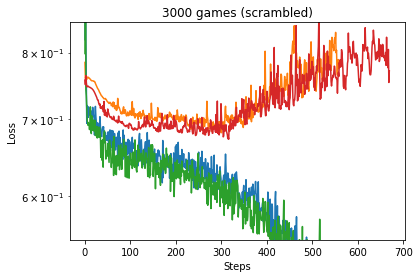

In [7]:
name = '250_2500bs2048lr0.1d0.001e10.npz'
plot2(name, '2500 games (scrambled)')
name = '300_3000bs2048lr0.1d0.001e10.npz'
plot2(name, '3000 games (scrambled)')
plt.ylim([0.55, 0.85])
plt.show()

Overfitting starts very shaply around 300 epochs

Namespace(batch_size=2048, decay=0.001, epochs=4, lr=0.1, momentum=0.9, t_tuple=[250, 2500], v_tuple=[0, 250], weights='00000')
Namespace(batch_size=2048, decay=0.001, epochs=4, lr=0.1, momentum=0.9, t_tuple=[300, 3000], v_tuple=[0, 300], weights='00000')


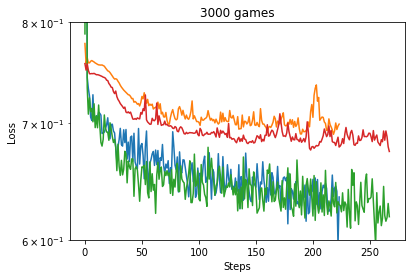

In [10]:
name = '250_2500bs2048lr0.1d0.001e4.npz'
plot2(name, '2500 games')
name = '300_3000bs2048lr0.1d0.001e4.npz'
plot2(name, '3000 games')
plt.ylim([0.6, 0.8])
plt.show()

Nice result :)

## 3500

Namespace(batch_size=2048, decay=0.001, epochs=10, lr=0.1, momentum=0.9, t_tuple=[300, 3000], v_tuple=[0, 300], weights='00000')
Namespace(batch_size=2048, decay=0.001, epochs=8, lr=0.1, momentum=0.9, t_tuple=[350, 3500], v_tuple=[0, 350], weights='00000')


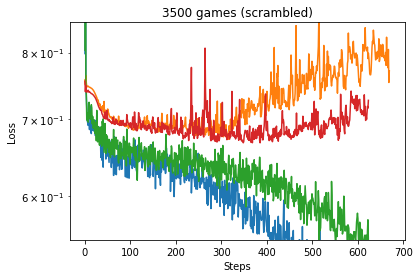

In [4]:
name = '300_3000bs2048lr0.1d0.001e10.npz'
plot2(name, '3000 games (scrambled)')
name = '350_3500bs2048lr0.1d0.001e8.npz'
plot2(name, '3500 games (scrambled)')
plt.ylim([0.55, 0.85])
plt.show()

Reduced initial run to 8 epochs to save time. I think I can get away with training for 5 epochs now.

Namespace(batch_size=2048, decay=0.001, epochs=4, lr=0.1, momentum=0.9, t_tuple=[300, 3000], v_tuple=[0, 300], weights='00000')
Namespace(batch_size=2048, decay=0.001, epochs=5, lr=0.1, momentum=0.9, t_tuple=[350, 3500], v_tuple=[0, 350], weights='00000')


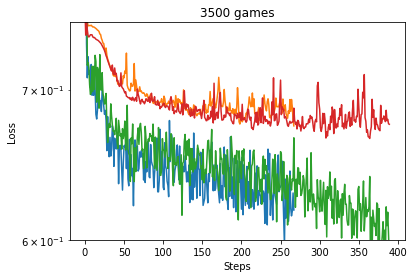

In [20]:
name = '300_3000bs2048lr0.1d0.001e4.npz'
plot2(name, '3000 games')
name = '350_3500bs2048lr0.1d0.001e5.npz'
plot2(name, '3500 games')
plt.ylim([0.6, 0.75])
plt.show()

## 4000

Namespace(batch_size=2048, decay=0.001, epochs=8, lr=0.1, momentum=0.9, t_tuple=[350, 3500], v_tuple=[0, 350], weights='00000')
Namespace(batch_size=2048, decay=0.001, epochs=10, lr=0.1, momentum=0.9, t_tuple=[400, 4000], v_tuple=[0, 400], weights='00000')


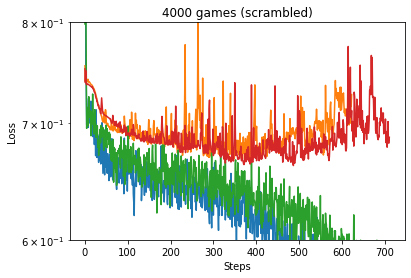

In [11]:
name = '350_3500bs2048lr0.1d0.001e8.npz'
plot2(name, '3500 games (scrambled)')
name = '400_4000bs2048lr0.1d0.001e8.npz'
plot2(name, '4000 games (scrambled)')
plt.ylim([0.6, 0.8])
plt.show()

Go back to 4 epochs. Overall validation loss is still decreasing. Should I test whether removing first 1000 games will help the network strength?

Namespace(batch_size=2048, decay=0.001, epochs=5, lr=0.1, momentum=0.9, t_tuple=[350, 3500], v_tuple=[0, 350], weights='00000')
Namespace(batch_size=2048, decay=0.001, epochs=4, lr=0.1, momentum=0.9, t_tuple=[400, 4000], v_tuple=[0, 400], weights='00000')


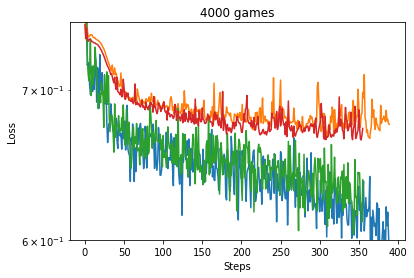

In [10]:
name = '350_3500bs2048lr0.1d0.001e5.npz'
plot2(name, '3500 games')
name = '400_4000bs2048lr0.1d0.001e4.npz'
plot2(name, '4000 games')
plt.ylim([0.6, 0.75])
plt.show()

### Drop first 1k
Validation loss has generally decreased with more training data. Now that I have 4000 games, it is worth trying to drop the first 1000k (played by random networks) to see if it improves validation loss and/or playing strength.

Namespace(batch_size=2048, decay=0.001, epochs=10, lr=0.1, momentum=0.9, t_tuple=[400, 4000], v_tuple=[0, 400], weights='00000')
Namespace(batch_size=2048, decay=0.001, epochs=8, lr=0.1, momentum=0.9, t_tuple=[1400, 4000], v_tuple=[1000, 1400], weights='00000')


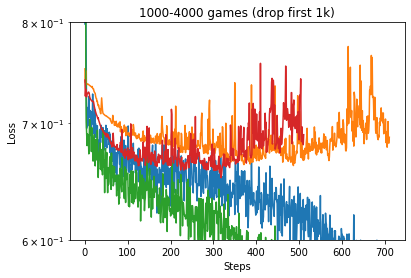

Validation loss is much lower


In [18]:
name = '400_4000bs2048lr0.1d0.001e8.npz'
plot2(name, '4000 games (scrambled)')
name = '1400_4000bs2048lr0.1d0.001e8.npz'
plot2(name, '1000-4000 games (drop first 1k)')
plt.ylim([0.6, 0.8])
plt.show()
print('Validation loss is much lower')

Namespace(batch_size=2048, decay=0.001, epochs=4, lr=0.1, momentum=0.9, t_tuple=[400, 4000], v_tuple=[0, 400], weights='00000')
Namespace(batch_size=2048, decay=0.001, epochs=5, lr=0.1, momentum=0.9, t_tuple=[1400, 4000], v_tuple=[1000, 1400], weights='00000')


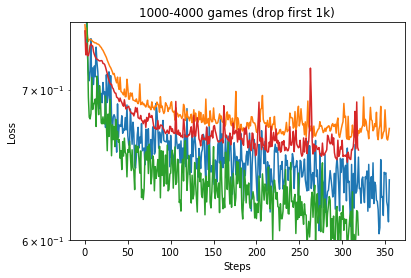

In [19]:
name = '400_4000bs2048lr0.1d0.001e4.npz'
plot2(name, '4000 games')
name = '1400_4000bs2048lr0.1d0.001e5.npz'
plot2(name, '1000-4000 games (drop first 1k)')
plt.ylim([0.6, 0.75])
plt.show()

Initial testing shows that 0-4k is 18 ordo stronger than 1k-4k, but with error of 30 ordo, the CFS is only 73%.

## 4500

Namespace(batch_size=2048, decay=0.001, epochs=10, lr=0.1, momentum=0.9, t_tuple=[400, 4000], v_tuple=[0, 400], weights='00000')
Namespace(batch_size=2048, decay=0.001, epochs=7, lr=0.1, momentum=0.9, t_tuple=[450, 4500], v_tuple=[0, 450], weights='00000')


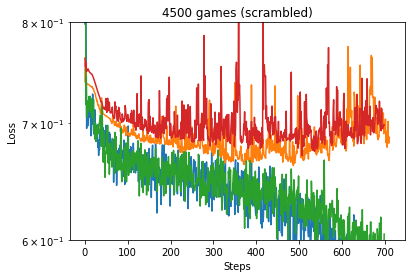

In [7]:
name = '400_4000bs2048lr0.1d0.001e8.npz'
plot2(name, '4000 games (scrambled)')
name = '450_4500bs2048lr0.1d0.001e7.npz'
plot2(name, '4500 games (scrambled)')
plt.ylim([0.6, 0.8])
plt.show()

Namespace(batch_size=2048, decay=0.001, epochs=4, lr=0.1, momentum=0.9, t_tuple=[400, 4000], v_tuple=[0, 400], weights='00000')
Namespace(batch_size=2048, decay=0.001, epochs=4, lr=0.1, momentum=0.9, t_tuple=[450, 4500], v_tuple=[0, 450], weights='00000')


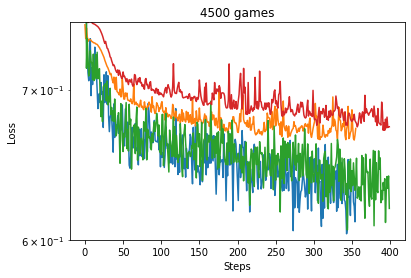

In [8]:
name = '400_4000bs2048lr0.1d0.001e4.npz'
plot2(name, '4000 games')
name = '450_4500bs2048lr0.1d0.001e4.npz'
plot2(name, '4500 games')
plt.ylim([0.6, 0.75])
plt.show()

Validation loss increased, and confirmed by doing both a 7 epoch run. The win rate for O was significantly increased in the last 500 games, so this may have increased the complexity of the problem. I still expect the network to play stronger. Optimum seems to stay around the 4th epoch.

## 5000

Namespace(batch_size=2048, decay=0.001, epochs=7, lr=0.1, momentum=0.9, t_tuple=[450, 4500], v_tuple=[0, 450], weights='00000')
Namespace(batch_size=2048, decay=0.001, epochs=8, lr=0.1, momentum=0.9, t_tuple=[500, 5000], v_tuple=[0, 500], weights='00000')


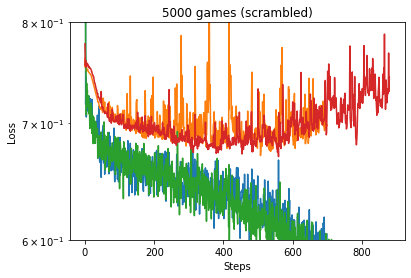

In [4]:
name = '450_4500bs2048lr0.1d0.001e7.npz'
plot2(name, '4500 games (scrambled)')
name = '500_5000bs2048lr0.1d0.001e8.npz'
plot2(name, '5000 games (scrambled)')
plt.ylim([0.6, 0.8])
plt.show()

Namespace(batch_size=2048, decay=0.001, epochs=4, lr=0.1, momentum=0.9, t_tuple=[450, 4500], v_tuple=[0, 450], weights='00000')
Namespace(batch_size=2048, decay=0.001, epochs=4, lr=0.1, momentum=0.9, t_tuple=[500, 5000], v_tuple=[0, 500], weights='00000')


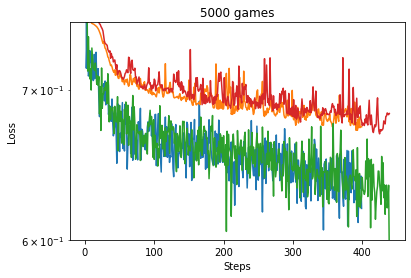

In [27]:
name = '450_4500bs2048lr0.1d0.001e4.npz'
plot2(name, '4500 games')
name = '500_5000bs2048lr0.1d0.001e4.npz'
plot2(name, '5000 games')
plt.ylim([0.6, 0.75])
plt.show()

Slight uptick in val loss at the end, but should be ok.

## 6000

Namespace(batch_size=2048, decay=0.001, epochs=8, lr=0.1, momentum=0.9, t_tuple=[500, 5000], v_tuple=[0, 500], weights='00000')
Namespace(batch_size=2048, decay=0.001, epochs=7, lr=0.1, momentum=0.9, t_tuple=[600, 6000], v_tuple=[0, 600], weights='00000')


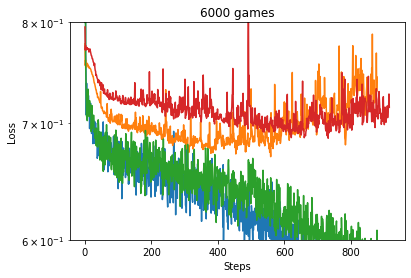

In [9]:
name = '500_5000bs2048lr0.1d0.001e8.npz'
plot2(name, '5000 games')
name = '600_6000bs2048lr0.1d0.001e7.npz'
plot2(name, '6000 games')
plt.ylim([0.6, 0.8])
plt.show()

Namespace(batch_size=2048, decay=0.001, epochs=4, lr=0.1, momentum=0.9, t_tuple=[500, 5000], v_tuple=[0, 500], weights='00000')
Namespace(batch_size=2048, decay=0.001, epochs=4, lr=0.1, momentum=0.9, t_tuple=[600, 6000], v_tuple=[0, 600], weights='00000')


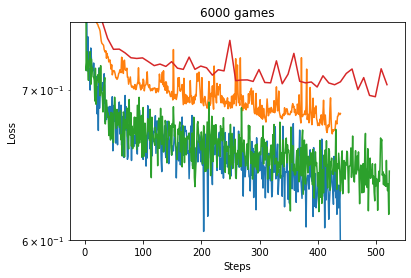

In [6]:
name = '500_5000bs2048lr0.1d0.001e4.npz'
plot2(name, '5000 games')
name = '600_6000bs2048lr0.1d0.001e4.npz'
plot3(name, '6000 games')
plt.ylim([0.6, 0.75])
plt.show()

Val loss has significantly increased, but these last 1000 games might be very different due to batch MCTS. Network still trains for 4 epochs before overfitting.

## 7000

Namespace(batch_size=2048, decay=0.001, epochs=7, lr=0.1, momentum=0.9, t_tuple=[600, 6000], v_tuple=[0, 600], weights='00000')
Namespace(batch_size=2048, decay=0.001, epochs=8, lr=0.1, momentum=0.9, t_tuple=[700, 7000], v_tuple=[0, 700], weights='00000')


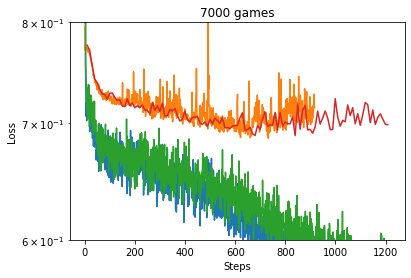

In [5]:
name = '600_6000bs2048lr0.1d0.001e7.npz'
plot2(name, '6000 games')
name = '700_7000bs2048lr0.1d0.001e8.npz'
plot3(name, '7000 games')
plt.ylim([0.6, 0.8])
plt.show()

Namespace(batch_size=2048, decay=0.001, epochs=4, lr=0.1, momentum=0.9, t_tuple=[600, 6000], v_tuple=[0, 600], weights='00000')
Namespace(batch_size=2048, decay=0.001, epochs=8, lr=0.1, momentum=0.9, t_tuple=[700, 7000], v_tuple=[0, 700], weights='00000')


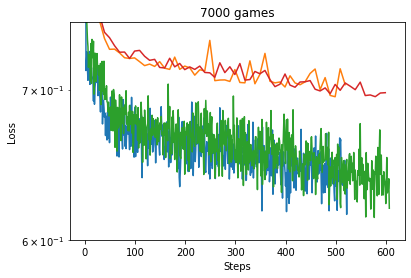

In [9]:
name = '600_6000bs2048lr0.1d0.001e4.npz'
plot3(name, '6000 games')
name = '700_7000bs2048lr0.1d0.001e8.npz'
plot3(name, '7000 games', cutoff=4/8)
plt.ylim([0.6, 0.75])
plt.show()

## 8000

Namespace(batch_size=2048, decay=0.001, epochs=8, lr=0.1, momentum=0.9, t_tuple=[700, 7000], v_tuple=[0, 700], weights='00000')
Namespace(batch_size=2048, decay=0.001, epochs=8, lr=0.1, momentum=0.9, t_tuple=[800, 8000], v_tuple=[0, 800], weights='00000')


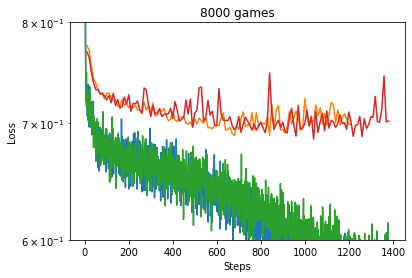

In [5]:
name = '700_7000bs2048lr0.1d0.001e8.npz'
plot3(name, '7000 games')
name = '800_8000bs2048lr0.1d0.001e8.npz'
plot3(name, '8000 games')
plt.ylim([0.6, 0.8])
plt.show()

Namespace(batch_size=2048, decay=0.001, epochs=8, lr=0.1, momentum=0.9, t_tuple=[700, 7000], v_tuple=[0, 700], weights='00000')
Namespace(batch_size=2048, decay=0.001, epochs=8, lr=0.1, momentum=0.9, t_tuple=[800, 8000], v_tuple=[0, 800], weights='00000')


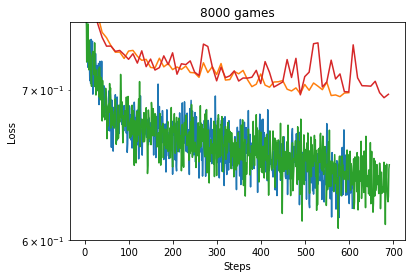

In [12]:
name = '700_7000bs2048lr0.1d0.001e8.npz'
plot3(name, '7000 games', cutoff=4/8)
name = '800_8000bs2048lr0.1d0.001e8.npz'
plot3(name, '8000 games', cutoff=4/8)
plt.ylim([0.6, 0.75])
plt.show()

## 9000

Namespace(batch_size=2048, decay=0.001, epochs=8, lr=0.1, momentum=0.9, t_tuple=[800, 8000], v_tuple=[0, 800], weights='00000')
Namespace(batch_size=2048, decay=0.001, epochs=8, lr=0.1, momentum=0.9, t_tuple=[900, 9000], v_tuple=[0, 900], weights='00000')


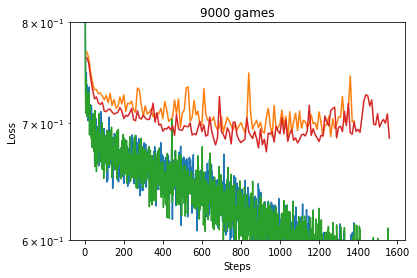

In [5]:
name = '800_8000bs2048lr0.1d0.001e8.npz'
plot3(name, '8000 games')
name = '900_9000bs2048lr0.1d0.001e8.npz'
plot3(name, '9000 games')
plt.ylim([0.6, 0.8])
plt.show()

Namespace(batch_size=2048, decay=0.001, epochs=8, lr=0.1, momentum=0.9, t_tuple=[800, 8000], v_tuple=[0, 800], weights='00000')
Namespace(batch_size=2048, decay=0.001, epochs=8, lr=0.1, momentum=0.9, t_tuple=[900, 9000], v_tuple=[0, 900], weights='00000')


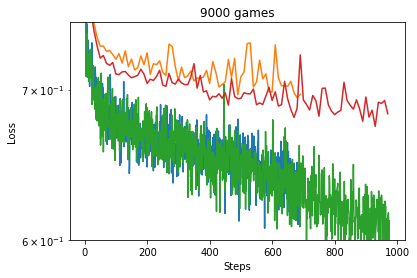

In [12]:
name = '800_8000bs2048lr0.1d0.001e8.npz'
plot3(name, '8000 games', cutoff=4/8)
name = '900_9000bs2048lr0.1d0.001e8.npz'
plot3(name, '9000 games', cutoff=5/8)
plt.ylim([0.6, 0.75])
plt.show()